In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.__version__

'2.10.0+cu126'

In [4]:
torch.tensor(5)

tensor(5)

In [5]:
data = [1,2,3]
torch.tensor(data)

tensor([1, 2, 3])

In [6]:
import numpy as np
np_data = np.array([[1,2],[3,4]])
torch.tensor(np_data)

tensor([[1, 2],
        [3, 4]])

In [7]:
torch.from_numpy(np_data)

tensor([[1, 2],
        [3, 4]])

In [ ]:
torch.arange(0,10,2) # 일정 간격으로 데이터를 생성

tensor([0, 2, 4, 6, 8])

In [11]:
torch.linspace(0,10,5)

tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])

In [13]:
torch.randint(0,10,(2,3))

tensor([[1, 0, 5],
        [6, 4, 8]])

In [17]:
torch.rand((3,128,128))

tensor([[[0.6120, 0.3053, 0.8308,  ..., 0.4366, 0.7028, 0.6096],
         [0.1061, 0.2969, 0.5465,  ..., 0.5121, 0.0785, 0.1847],
         [0.6345, 0.6696, 0.7292,  ..., 0.9057, 0.8617, 0.4763],
         ...,
         [0.3352, 0.3628, 0.7618,  ..., 0.4371, 0.8309, 0.4074],
         [0.4030, 0.1151, 0.9389,  ..., 0.3094, 0.9816, 0.0898],
         [0.6977, 0.1420, 0.7827,  ..., 0.8683, 0.7703, 0.5700]],

        [[0.0126, 0.5927, 0.6853,  ..., 0.1465, 0.7800, 0.4835],
         [0.5362, 0.1371, 0.3597,  ..., 0.8892, 0.2854, 0.2190],
         [0.7069, 0.7053, 0.0614,  ..., 0.2751, 0.6007, 0.2466],
         ...,
         [0.6300, 0.0160, 0.7821,  ..., 0.9670, 0.0368, 0.7343],
         [0.6221, 0.8870, 0.6464,  ..., 0.0851, 0.5942, 0.7633],
         [0.8644, 0.6983, 0.3090,  ..., 0.2355, 0.6785, 0.1956]],

        [[0.3747, 0.5962, 0.2078,  ..., 0.7347, 0.7530, 0.2119],
         [0.5705, 0.2504, 0.1804,  ..., 0.8861, 0.9807, 0.9966],
         [0.6958, 0.5414, 0.5796,  ..., 0.0929, 0.1181, 0.

In [18]:
torch.zeros(2,3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [19]:
torch.ones(2,3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [20]:
torch.full((2,3) , 255)

tensor([[255, 255, 255],
        [255, 255, 255]])

In [21]:
torch.eye(5,4)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 0.]])

In [22]:
# tensor의 속성

tdata = torch.randint(0,255,(128,128))

tdata

tensor([[209, 239, 231,  ..., 104,  89, 242],
        [145, 223,  44,  ..., 165, 232,  93],
        [230,  91, 180,  ...,  55, 158,   9],
        ...,
        [230,  41,  36,  ..., 159, 130, 254],
        [205, 185,  19,  ..., 184, 163, 246],
        [ 52,  71, 146,  ..., 174, 160,  33]])

In [23]:
tdata.shape

torch.Size([128, 128])

In [24]:
tdata.dtype

torch.int64

In [25]:
tdata.device

device(type='cpu')

In [26]:
tdata.T

tensor([[209, 145, 230,  ..., 230, 205,  52],
        [239, 223,  91,  ...,  41, 185,  71],
        [231,  44, 180,  ...,  36,  19, 146],
        ...,
        [104, 165,  55,  ..., 159, 184, 174],
        [ 89, 232, 158,  ..., 130, 163, 160],
        [242,  93,   9,  ..., 254, 246,  33]])

In [28]:
tdata.to('cuda')

tensor([[209, 239, 231,  ..., 104,  89, 242],
        [145, 223,  44,  ..., 165, 232,  93],
        [230,  91, 180,  ...,  55, 158,   9],
        ...,
        [230,  41,  36,  ..., 159, 130, 254],
        [205, 185,  19,  ..., 184, 163, 246],
        [ 52,  71, 146,  ..., 174, 160,  33]], device='cuda:0')

In [30]:
tdata = torch.zeros(2,3)
tdata

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [31]:
tdata + 10

tensor([[10., 10., 10.],
        [10., 10., 10.]])

In [32]:
tdata = torch.zeros(2,3)
tdata1 = torch.ones(2,3)

In [33]:
print(tdata)
print(tdata1)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [34]:
tdata+tdata1

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [35]:
tdata-tdata1

tensor([[-1., -1., -1.],
        [-1., -1., -1.]])

In [36]:
tdata*tdata1

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [37]:
mat1 = torch.tensor([[1,2,3],[4,5,6]])
mat2 = torch.tensor([[1,2],[3,4],[5,6]])

torch.matmul(mat1,mat2)

tensor([[22, 28],
        [49, 64]])

In [38]:
mat1*mat2

RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1

In [49]:
data = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
data.shape

torch.Size([3, 3])

In [50]:
data[0]

tensor([1, 2, 3])

In [51]:
data[1]

tensor([4, 5, 6])

In [53]:
data[:,-1]

tensor([3, 6, 9])

In [54]:
data[:,0:2]

tensor([[1, 2],
        [4, 5],
        [7, 8]])

In [56]:
data = torch.zeros(128,128)
data

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
data[12:77,12:77]

In [59]:
data = torch.tensor([[1,2],[3,4]])

torch.sum(data).item()

10

In [65]:
print(data.dtype)
data = data.to(torch.float16)
torch.mean(data)

torch.int64


tensor(2.5000, dtype=torch.float16)

In [66]:
torch.var(data)

tensor(1.6670, dtype=torch.float16)

In [67]:
torch.std(data)

tensor(1.2910, dtype=torch.float16)

In [68]:
data = torch.randint(0,255,(128,128))
data

tensor([[ 72, 159,   2,  ..., 253,  61, 208],
        [ 62,  20, 145,  ...,  87, 236, 107],
        [ 12, 206, 225,  ..., 220,  30, 207],
        ...,
        [ 15, 252,  89,  ...,  88,  12, 234],
        [172, 161, 236,  ..., 204,   9, 249],
        [151,  30, 193,  ...,  85, 119,  69]])

In [69]:
data.numpy()

array([[ 72, 159,   2, ..., 253,  61, 208],
       [ 62,  20, 145, ...,  87, 236, 107],
       [ 12, 206, 225, ..., 220,  30, 207],
       ...,
       [ 15, 252,  89, ...,  88,  12, 234],
       [172, 161, 236, ..., 204,   9, 249],
       [151,  30, 193, ...,  85, 119,  69]], shape=(128, 128))

In [71]:
data = torch.tensor([1,2,3])
data.shape

torch.Size([3])

In [73]:
data_mat = data.unsqueeze(0)
data_mat

tensor([[1, 2, 3]])

In [74]:
data = torch.tensor([[1,2,3]])
data.squeeze(0)

tensor([1, 2, 3])

In [75]:
data = torch.tensor([[1,2],[3,4]])

data.view(-1)

tensor([1, 2, 3, 4])

In [78]:
torch.cuda.is_available() # cuda 사용유무
torch.cuda.device_count()
torch.cuda.current_device()

0

In [79]:
data = torch.tensor([1,2,3])
data

tensor([1, 2, 3])

In [ ]:
device = 'cuda:1' if torch.cuda.is_available() else 'cpu'

data = data.to(device)
data

tensor([1, 2, 3], device='cuda:0')

In [83]:
data1 = torch.tensor([10,20,30])

data + data1

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [113]:
data = torch.tensor([1.,2.,3.] , requires_grad=True)
data


tensor([1., 2., 3.], requires_grad=True)

In [114]:
a = data +1
a

tensor([2., 3., 4.], grad_fn=<AddBackward0>)

In [115]:
b = a * 2
b

tensor([4., 6., 8.], grad_fn=<MulBackward0>)

In [121]:
c = b ** 2
print(c)
print(c.sum())


tensor([16., 36., 64.], grad_fn=<PowBackward0>)
tensor(116., grad_fn=<SumBackward0>)


In [124]:
print(b.grad)

None


C:\Users\user\AppData\Local\Temp\ipykernel_21708\1999570874.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\build\aten\src\ATen/core/TensorBody.h:497.)
  print(b.grad)


In [ ]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        print('--------------init')
        self.fc1 = nn.Linear(in_features= 3, out_features=4, bias=True)
        self.fc1_act = nn.ReLU()
        self.fc2 = nn.Linear(in_features=4,out_features=3, bias=True)
        self.fc2_act = nn.ReLU()
        self.fc3 = nn.Linear(in_features=3, out_features=1)

    def forward(self,x):
        out = self.fc1(x)
        out = self.fc1_act(out)
        out = self.fc2(out)
        out = self.fc2_act(out)
        out = self.fc3(out)
        return out

model = Net()(x)
model

--------------init


TypeError: Net.forward() missing 1 required positional argument: 'x'

In [103]:
list(model1.parameters())

[Parameter containing:
 tensor([[-0.4252, -0.1348,  0.2049],
         [ 0.2019, -0.2219,  0.3685],
         [ 0.3081, -0.0632, -0.1271],
         [-0.2675,  0.0557,  0.0719]], requires_grad=True),
 Parameter containing:
 tensor([ 0.1307,  0.2231, -0.5499,  0.3222], requires_grad=True),
 Parameter containing:
 tensor([[ 0.2193, -0.1657,  0.2372, -0.0925],
         [-0.1022, -0.1890,  0.4499,  0.3333],
         [-0.0957, -0.0191, -0.2214, -0.1932]], requires_grad=True),
 Parameter containing:
 tensor([-0.0145,  0.4959, -0.0887], requires_grad=True),
 Parameter containing:
 tensor([[-0.2975, -0.5455,  0.1134]], requires_grad=True),
 Parameter containing:
 tensor([0.4566], requires_grad=True)]

In [125]:
sum(p.numel() for p in model1.parameters())

35

In [135]:
X = torch.randn(100,1)
X = X*10
X.shape

torch.Size([100, 1])

In [136]:
y = X+torch.randn(100,1)
y.shape

torch.Size([100, 1])

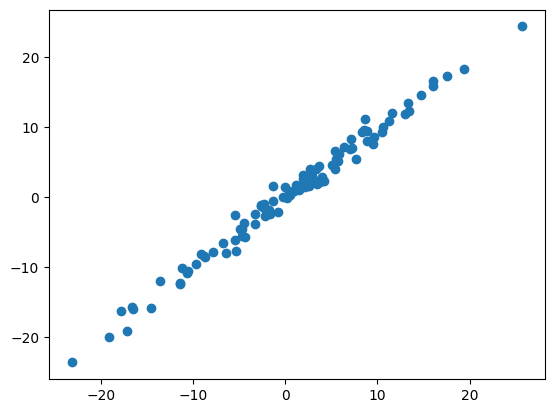

In [138]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.show()

In [168]:
import torch.nn as nn

class LRModel(nn.Module):
    def __init__(self):
        super(LRModel,self).__init__()
        self.fc1 = nn.Linear(1,4)
        self.fc1_act = nn.ReLU()
        self.fc2 = nn.Linear(4,3)
        self.fc2_act = nn.ReLU()
        self.fc3 = nn.Linear(3,1)

    def forward(self,x):
        x = self.fc1(x)
        x = self.fc1_act(x)
        x = self.fc2(x)
        x = self.fc2_act(x)
        x = self.fc3(x)

        return x
    

model = LRModel()
model

    

LRModel(
  (fc1): Linear(in_features=1, out_features=4, bias=True)
  (fc1_act): ReLU()
  (fc2): Linear(in_features=4, out_features=3, bias=True)
  (fc2_act): ReLU()
  (fc3): Linear(in_features=3, out_features=1, bias=True)
)

In [169]:
list(model.parameters())

[Parameter containing:
 tensor([[0.7171],
         [0.9175],
         [0.1241],
         [0.7467]], requires_grad=True),
 Parameter containing:
 tensor([ 0.3388, -0.8944,  0.5261,  0.5564], requires_grad=True),
 Parameter containing:
 tensor([[ 0.3447,  0.3872, -0.1910, -0.3348],
         [-0.0743, -0.3299, -0.3175, -0.2740],
         [-0.3740, -0.1072, -0.3812, -0.4685]], requires_grad=True),
 Parameter containing:
 tensor([ 0.4339, -0.1887, -0.1267], requires_grad=True),
 Parameter containing:
 tensor([[-0.4547, -0.2143,  0.2535]], requires_grad=True),
 Parameter containing:
 tensor([-0.3333], requires_grad=True)]

In [175]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)  #1e-3
epochs = 3000

loss_list = []

for epoch in range(epochs):
    optimizer.zero_grad()
    pred = model(X)
    loss = criterion(pred,y)
    print(loss)
    loss_list.append(loss.item())
    loss.backward()
    optimizer.step()






tensor(1.0738, grad_fn=<MseLossBackward0>)
tensor(1.0774, grad_fn=<MseLossBackward0>)
tensor(1.0740, grad_fn=<MseLossBackward0>)
tensor(1.0745, grad_fn=<MseLossBackward0>)
tensor(1.0757, grad_fn=<MseLossBackward0>)
tensor(1.0750, grad_fn=<MseLossBackward0>)
tensor(1.0739, grad_fn=<MseLossBackward0>)
tensor(1.0738, grad_fn=<MseLossBackward0>)
tensor(1.0745, grad_fn=<MseLossBackward0>)
tensor(1.0748, grad_fn=<MseLossBackward0>)
tensor(1.0743, grad_fn=<MseLossBackward0>)
tensor(1.0738, grad_fn=<MseLossBackward0>)
tensor(1.0737, grad_fn=<MseLossBackward0>)
tensor(1.0741, grad_fn=<MseLossBackward0>)
tensor(1.0743, grad_fn=<MseLossBackward0>)
tensor(1.0741, grad_fn=<MseLossBackward0>)
tensor(1.0738, grad_fn=<MseLossBackward0>)
tensor(1.0737, grad_fn=<MseLossBackward0>)
tensor(1.0738, grad_fn=<MseLossBackward0>)
tensor(1.0740, grad_fn=<MseLossBackward0>)
tensor(1.0740, grad_fn=<MseLossBackward0>)
tensor(1.0738, grad_fn=<MseLossBackward0>)
tensor(1.0737, grad_fn=<MseLossBackward0>)
tensor(1.07

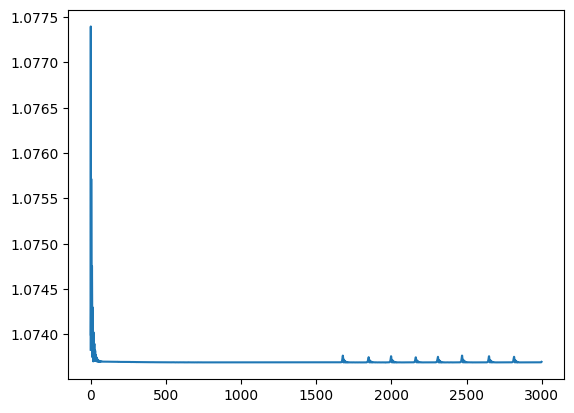

In [176]:
plt.plot(range(epochs),loss_list)
plt.show()